In [77]:
# Nguyễn Hữu Thâu - 19146265
# Lớp chiều thứ 5 - tiết 10 - 12

In [78]:
import glob
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from random import randint
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive

In [79]:
drive.mount('/content/drive',force_remount=True)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/mon an/train',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')
test=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/mon an/test',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')


Mounted at /content/drive
Found 218 images belonging to 10 classes.
Found 244 images belonging to 10 classes.


In [80]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))

model.add(Dense(10,activation='Softmax'))
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
#opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(optimizer = 'adam', loss ='categorical_crossentropy',metrics = ['accuracy'])
callbacks=[EarlyStopping(monitor='val_loss',patience=100)]
history=model.fit(train,
                  steps_per_epoch=len(train),
                  batch_size = 32,
                  epochs=10,
                  validation_data=test,
                  validation_steps=len(test),
                  callbacks=callbacks,
                  verbose = 1)

Epoch 1/10
7/7 [==============================] - 10s 1s/step - loss: 6.0111 - accuracy: 0.1972 - val_loss: 2.6547 - val_accuracy: 0.0000e+00
Epoch 2/10
7/7 [==============================] - 8s 1s/step - loss: 0.8780 - accuracy: 0.7477 - val_loss: 4.1319 - val_accuracy: 0.2910
Epoch 3/10
7/7 [==============================] - 8s 1s/step - loss: 0.0780 - accuracy: 0.9954 - val_loss: 7.4228 - val_accuracy: 0.1148
Epoch 4/10
7/7 [==============================] - 8s 1s/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 10.6811 - val_accuracy: 0.1926
Epoch 5/10
7/7 [==============================] - 9s 1s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 12.9715 - val_accuracy: 0.1926
Epoch 6/10
7/7 [==============================] - 8s 1s/step - loss: 8.7209e-04 - accuracy: 1.0000 - val_loss: 13.2451 - val_accuracy: 0.1926
Epoch 7/10
7/7 [==============================] - 8s 1s/step - loss: 1.5416e-04 - accuracy: 1.0000 - val_loss: 13.0667 - val_accuracy: 0.1926
Epoch 8/10
7/7 [========

In [82]:
#đánh giá chất lượng của mô hình và vẽ lại
score = model.evaluate(test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])

Sai số kiểm tra là:  13.136046409606934
Độ chính xác kiểm tra là:  0.19262294471263885


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


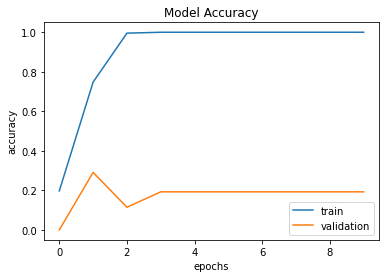

In [83]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'],loc='upper_left')

In [84]:
model.save('model_monan.h5')

In [90]:
classe = ['THỊT KHO', 'MÌ XÀO', 'BÚN THỊT NƯỚNG', 'BÁNH LỌT', 'BÁNH MÌ', 'CÀ RI', 'CƠM TẤM', 'PHỞ', 'CANH CHUA', 'XÔI MẶN']


In [91]:
from tensorflow.keras.models import load_model
model=load_model('model_monan.h5')

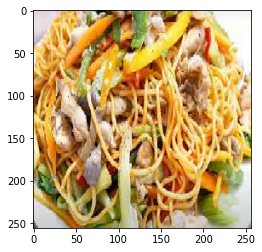

In [92]:
img_path = '/content/drive/MyDrive/Colab Notebooks/mon an/hinh/2.jpg'
img=load_img(img_path,target_size=(256,256))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
monan=np.argmax(model.predict(img),axis=1)
pred = model.predict(img)

In [93]:
np.argmax(model.predict(img),axis=1)

array([8])

In [94]:
print(np.argmax(pred))
if monan==0:
  print(classe[0])
else: print(classe[1])

8
MÌ XÀO
